In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [ ]:
iris_df = pd.read_csv('Iris.csv')
employee_df = pd.read_csv('Employee.csv')
diabetes_df = pd.read_csv('diabetes.csv')
cancer_df = pd.read_csv('breast-cancer.csv')
cirrhosis_df = pd.read_csv('cirrhosis.csv')

Iris Dataset

In [ ]:
iris_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
y = iris_df['Species']
X = iris_df.drop('Species',axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_y_pred = dt_classifier.predict(X_test)

# Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_y_pred = nb_classifier.predict(X_test)

Accuracy for Decision Tree Classifier: 1.0
Confusion Matrix for Decision Tree Classifier:
Accuracy for Naive Bayes Classifier: 1.0

Confusion Matrix for Naive Bayes Classifier:


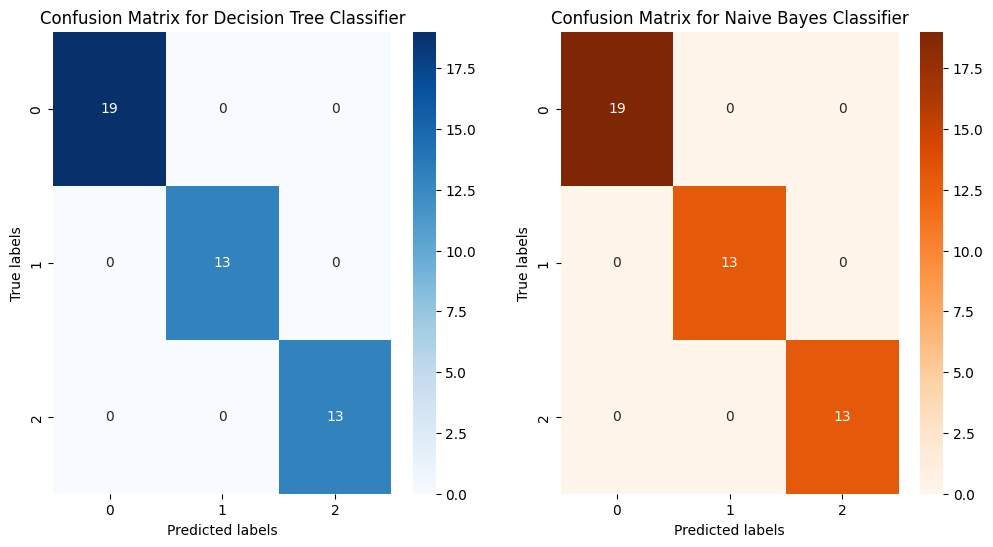

In [ ]:
    dt_cm = confusion_matrix(y_test, dt_y_pred)
    # print(dt_cm)
    print("Accuracy for Decision Tree Classifier:", accuracy_score(y_test, dt_y_pred))
    print("Confusion Matrix for Decision Tree Classifier:")


    nb_cm = confusion_matrix(y_test, nb_y_pred)
    # print(nb_cm)
    print("Accuracy for Naive Bayes Classifier:", accuracy_score(y_test, nb_y_pred))
    print("\nConfusion Matrix for Naive Bayes Classifier:")

    # Plot confusion matrix
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
    ax[0].set_title('Confusion Matrix for Decision Tree Classifier')
    ax[0].set_xlabel('Predicted labels')
    ax[0].set_ylabel('True labels')

    sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Oranges', ax=ax[1])
    ax[1].set_title('Confusion Matrix for Naive Bayes Classifier')
    ax[1].set_xlabel('Predicted labels')
    ax[1].set_ylabel('True labels')

    plt.show()

Performing for other datasets

In [ ]:
def perform_classification(X, y, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

    # Decision Tree Classifier
    dt_classifier = DecisionTreeClassifier()
    dt_classifier.fit(X_train, y_train)
    dt_y_pred = dt_classifier.predict(X_test)
    dt_y_pred_prob = dt_classifier.predict_proba(X_test)[:, 1]

    # Naive Bayes Classifier
    nb_classifier = GaussianNB()
    nb_classifier.fit(X_train, y_train)
    nb_y_pred = nb_classifier.predict(X_test)
    nb_y_pred_prob = nb_classifier.predict_proba(X_test)[:, 1]

    # Print results
    dt_cm = confusion_matrix(y_test, dt_y_pred)
    print("Accuracy for Decision Tree Classifier:", accuracy_score(y_test, dt_y_pred))
    print("Confusion Matrix for Decision Tree Classifier:")
    print(dt_cm)

    nb_cm = confusion_matrix(y_test, nb_y_pred)
    print("Accuracy for Naive Bayes Classifier:", accuracy_score(y_test, nb_y_pred))
    print("Confusion Matrix for Naive Bayes Classifier:")
    print(nb_cm)

    # Plot confusion matrix
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
    ax[0].set_title('Confusion Matrix for Decision Tree Classifier')
    ax[0].set_xlabel('Predicted labels')
    ax[0].set_ylabel('True labels')

    sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Oranges', ax=ax[1])
    ax[1].set_title('Confusion Matrix for Naive Bayes Classifier')
    ax[1].set_xlabel('Predicted labels')
    ax[1].set_ylabel('True labels')

    # Plot AUROC curve
    fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_y_pred_prob)
    fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_y_pred_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_dt, tpr_dt, color='b', lw=2, label='Decision Tree ROC curve')
    plt.plot(fpr_nb, tpr_nb, color='r', lw=2, label='Naive Bayes ROC curve')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    print("--------------------------------------------------")

In [ ]:
def switch_datasets_and_classify(X1, y1, X2, y2, X3, y3):
    datasets = [(X1, y1), (X2, y2), (X3, y3)]
    for i, data in enumerate(datasets, start=1):
        print(f"Dataset {i}:")
        perform_classification(data[0], data[1])

In [ ]:
# employee_df.head()
# diabetes_df.head()
# fetal_df.head()
cirrhosis_df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


Label encoding the non-numeric data

In [ ]:
label_encoder = LabelEncoder()
employee_df['Education'] = label_encoder.fit_transform(employee_df['Education'])
employee_df['City'] = label_encoder.fit_transform(employee_df['City'])
employee_df['Gender'] = label_encoder.fit_transform(employee_df['Gender'])
employee_df['EverBenched'] = label_encoder.fit_transform(employee_df['EverBenched'])

label_encoder = LabelEncoder()
cancer_df['diagnosis'] = label_encoder.fit_transform(cancer_df['diagnosis'])
cirrhosis_df['Status'] = label_encoder.fit_transform(cirrhosis_df['Status'])
cirrhosis_df['Drug'] = label_encoder.fit_transform(cirrhosis_df['Drug'])
cirrhosis_df['Sex'] = label_encoder.fit_transform(cirrhosis_df['Sex'])
cirrhosis_df['Ascites'] = label_encoder.fit_transform(cirrhosis_df['Ascites'])
cirrhosis_df['Hepatomegaly'] = label_encoder.fit_transform(cirrhosis_df['Hepatomegaly'])
cirrhosis_df['Spiders'] = label_encoder.fit_transform(cirrhosis_df['Spiders'])
cirrhosis_df['Edema'] = label_encoder.fit_transform(cirrhosis_df['Edema'])


In [ ]:
cirrhosis_df.dropna(subset=['Drug'],inplace=True)

In [ ]:
nancolumns=cirrhosis_df.columns[cirrhosis_df.isna().any()].tolist()

In [ ]:
for i in nancolumns:
    cirrhosis_df[i]=cirrhosis_df[i].fillna(cirrhosis_df[i].mean())
cirrhosis_df.describe()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,209.500000,1917.782297,0.830144,0.875598,18533.351675,0.105263,0.564593,0.889952,0.722488,0.200957,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,0.955785,0.785863,3815.845055,0.307260,0.868798,0.778823,0.842243,0.506835,4.407506,191.077413,0.424972,73.697982,1848.437803,48.965657,53.479887,97.020057,1.019547,0.875673
min,1.000000,41.000000,0.000000,0.000000,9598.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,0.000000,0.000000,15644.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,273.000000,3.242500,51.250000,1016.250000,91.000000,95.000000,190.000000,10.000000,2.000000
50%,209.500000,1730.000000,0.000000,1.000000,18628.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.400000,369.510563,3.530000,97.648387,1717.000000,122.556346,124.702128,253.000000,10.600000,3.000000
75%,313.750000,2613.500000,2.000000,2.000000,21272.500000,0.000000,2.000000,2.000000,2.000000,0.000000,3.400000,369.510563,3.770000,100.750000,1982.655769,135.750000,127.750000,315.500000,11.100000,4.000000
max,418.000000,4795.000000,2.000000,2.000000,28650.000000,1.000000,2.000000,2.000000,2.000000,2.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [ ]:
y1 = employee_df['LeaveOrNot']
X1 = employee_df.drop('LeaveOrNot',axis=1)

y2 = diabetes_df['Outcome']
X2 = diabetes_df.drop('Outcome',axis=1)

y3 = cancer_df['diagnosis']
X3 = cancer_df.drop('diagnosis',axis=1)

y4 = cirrhosis_df['Stage']
X4 = cirrhosis_df.drop('Stage',axis=1)

Dataset 1:
Accuracy for Decision Tree Classifier: 0.833810888252149
Confusion Matrix for Decision Tree Classifier:
[[829  91]
 [141 335]]
Accuracy for Naive Bayes Classifier: 0.6797994269340975
Confusion Matrix for Naive Bayes Classifier:
[[731 189]
 [258 218]]


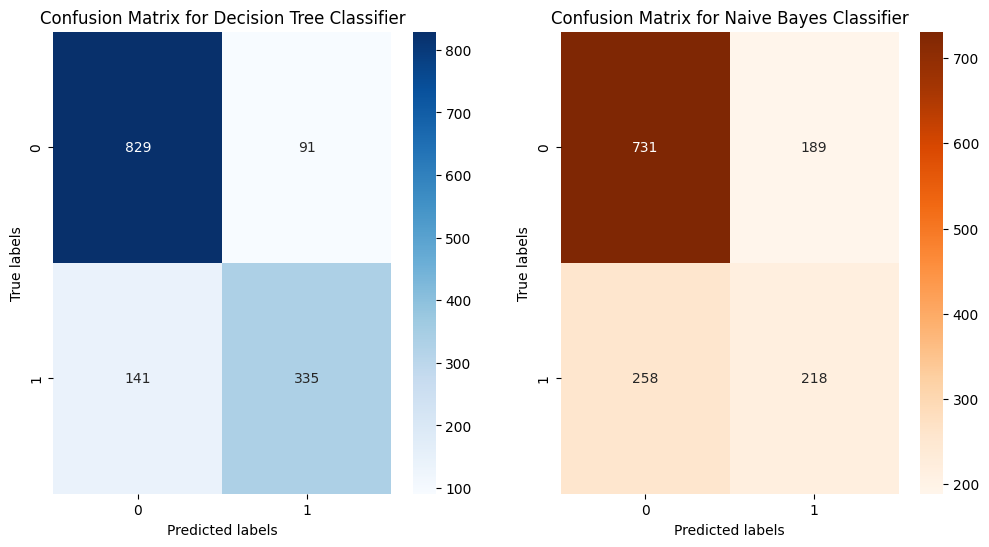

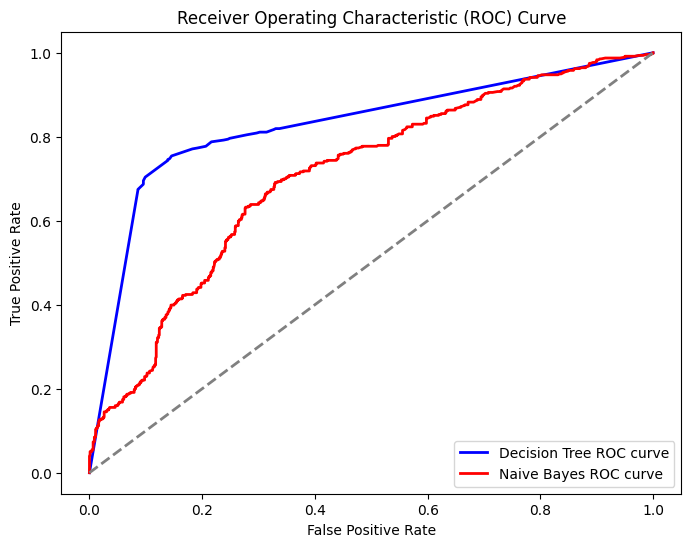

--------------------------------------------------
Dataset 2:
Accuracy for Decision Tree Classifier: 0.7012987012987013
Confusion Matrix for Decision Tree Classifier:
[[114  37]
 [ 32  48]]
Accuracy for Naive Bayes Classifier: 0.7445887445887446
Confusion Matrix for Naive Bayes Classifier:
[[119  32]
 [ 27  53]]


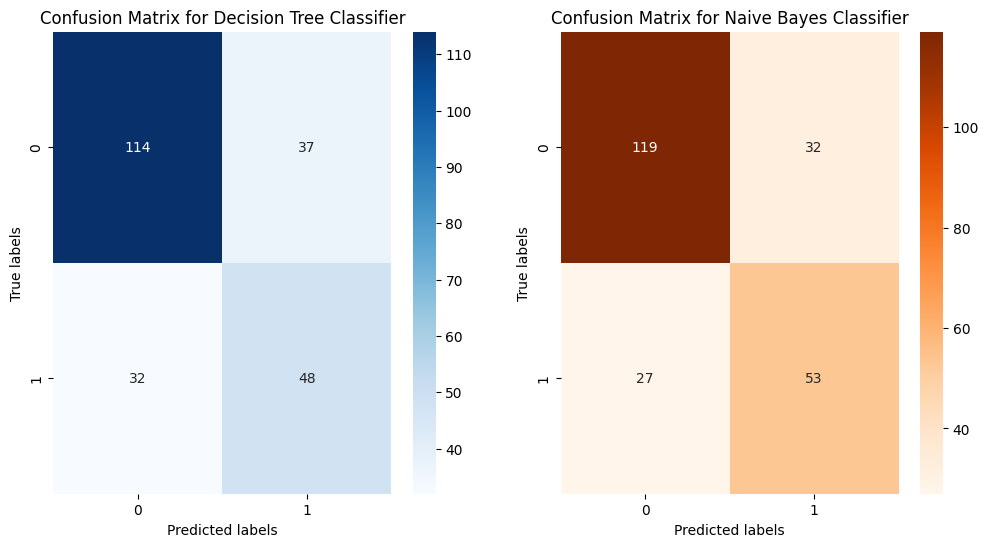

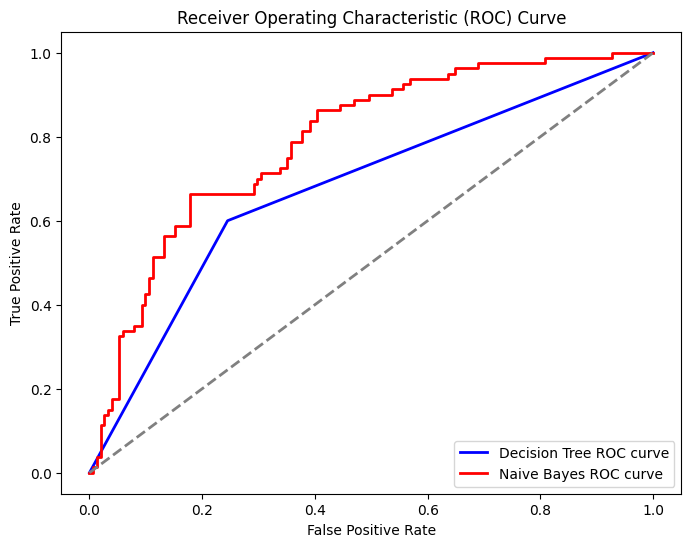

--------------------------------------------------
Dataset 3:
Accuracy for Decision Tree Classifier: 0.9181286549707602
Confusion Matrix for Decision Tree Classifier:
[[98 10]
 [ 4 59]]
Accuracy for Naive Bayes Classifier: 0.6374269005847953
Confusion Matrix for Naive Bayes Classifier:
[[107   1]
 [ 61   2]]


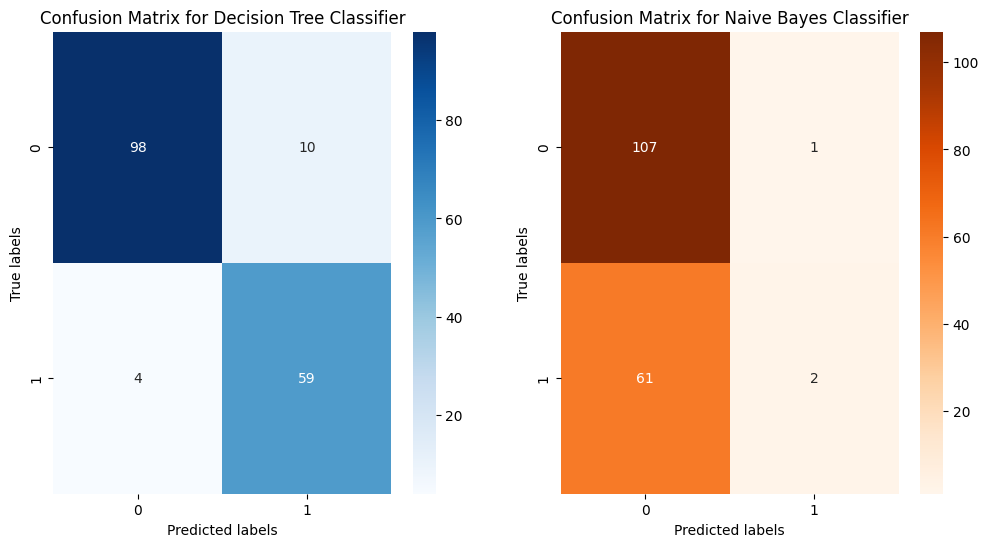

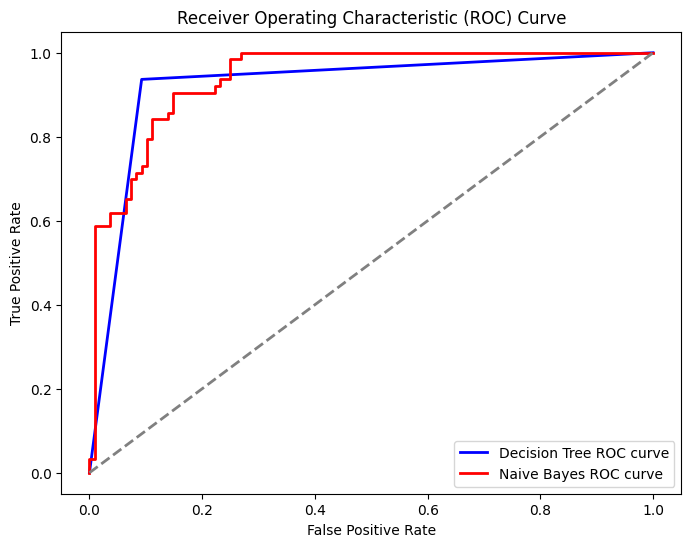

--------------------------------------------------


In [ ]:
switch_datasets_and_classify(X1, y1, X2, y2, X3, y3)